<a href="https://colab.research.google.com/github/pandaJam/learn-TF_DL-fundamentals-in-Python/blob/master/Binary%20Classification_with_TF_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is an intro to neural network classification with tensorflow

Few types of classification:

*   Binary classification
*   Multiclass
*   Multilabel




# Creating data to view and fit

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Make 1000 samples (make large circles with small circles in 2D, a toy dataset to visualize classification and clustering)
n_samples = 1000 

X,y = make_circles(n_samples,
                   noise = .03,
                   random_state = 42)
X,y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

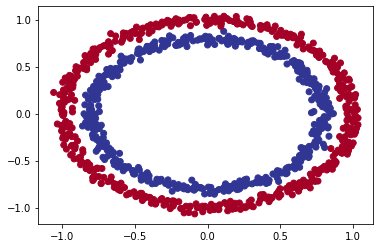

In [2]:
plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [3]:
circles = pd.DataFrame({"X0":  X[:,0],
                        "X1" : X[:,1],
                       "label" : y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [4]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

Here we are trying to model whether a given point is red or blue, or we are trying to draw a line between red and blue circles.

In [6]:
X[0]

array([0.75424625, 0.23148074])

In [5]:
def plot_decision_boundary(model, X,y):

  x_min,x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min,y_max = X[:,0].min() - 0.1, X[:,0].max()+0.1

  print(x_min,x_max,y_min,y_max )
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  x_in = np.c_[xx.ravel(),yy.ravel()]  # stack 2D arrays together

  y_pred = model.predict(x_in)
  print(len(y_pred[0]))
  # check for multi-class
  if len(y_pred[0]) > 1:
    print("Multiclass predictions")
  # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max()) 


# Build our first NN with linear activation fn

In [8]:
tf.random.set_seed(42)
model_0 = tf.keras.Sequential([tf.keras.layers.Dense(1,activation='linear')])
model_0.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"])
model_0.fit(X,y,epochs = 50)

Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5130
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6948 - accuracy: 0.4846
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5087
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4995
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5127
Epoch 11/50
32/32 [

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...


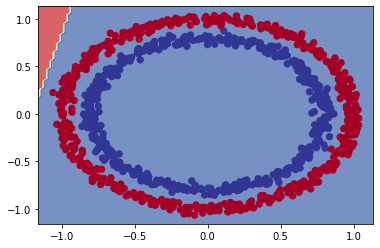

In [9]:
plot_decision_boundary(model_0, X, y)

*   Red -> Red
*   Blue -> blue class
*   Yellow -> crossover (can be red or blue)

# Build our first NN with non-linear activation fn ( 1 layer)

In [10]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1,activation='relu')
])
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"])
model_1.fit(X,y,epochs = 50)

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5130
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4846
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5087
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4995
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5127
Epoch 11/50
32/32 [

There are 500 samples belonging to blue and red class respectively. Accuracy is only 50% even after training longer - looks like model is guessing the points

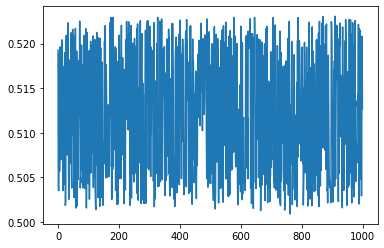

In [11]:
pred_y = model_1.predict(X)
plt.plot(pred_y)

The above plot shows that almost all the predictions are in a range 0.5

Let's plot the decision boundary created by a model predicting on X.

*   Create a meshgrid of diff values of X
*   Make predictions across the meshgrid
*   Plot the predictions as well as a line between zones ( where each unique class falls)


-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...


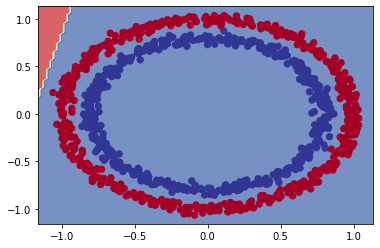

In [12]:
plot_decision_boundary(model_1, X, y)

**2 layer network**

In [13]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(1,activation = 'relu') # since there is either 0 or 1
])
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"])
model_2.fit(X,y,epochs = 50,verbose = 0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.5730


[0.6669418811798096, 0.5730000138282776]

1st  value is loss and 2nd value is accuracy.

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...


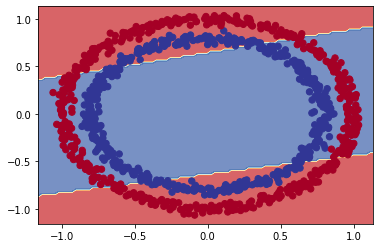

In [14]:
plot_decision_boundary(model_2, X, y)

# Changing the activation of output layer

In [15]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation = 'relu'),
                              #  tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(1,activation = 'sigmoid') # since there is either 0 or 1
])
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"])
model_3.fit(X,y,epochs = 100,verbose = 0)
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5640


[0.6801121234893799, 0.5640000104904175]

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...


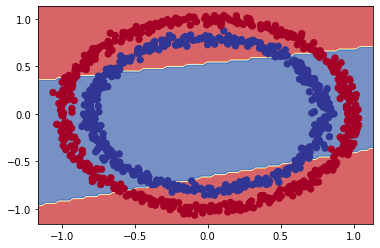

In [16]:
plot_decision_boundary(model_3, X, y)

# Change optimizer

In [17]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation = 'relu'),
                              #  tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])
model_4.fit(X,y,epochs = 100,verbose = 0)
model_4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.7820


[0.6274422407150269, 0.7820000052452087]

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...


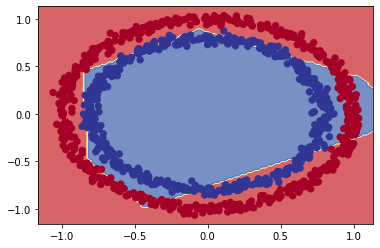

In [18]:
plot_decision_boundary(model_4, X, y)

It is a **circular data/ non-linear data** and the model is trying to separate the non-linear data using a straight line. Hence we have to introduce the non-linearity.

Non-linear data is the data that is not possible to model with straight lines.

Changing the output activation layer improved the network.

# Model Improvement - Increase the layers

In [19]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])
model_5.fit(X,y,epochs = 100,verbose = 2)
model_5.evaluate(X,y)

Epoch 1/100
32/32 - 1s - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 - 0s - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 - 0s - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 - 0s - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 - 0s - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 - 0s - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 - 0s - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 - 0s - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 - 0s - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 - 0s - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 - 0s - loss: 0.6760 - accuracy: 0.5500
Epoch 12/100
32/32 - 0s - loss: 0.6754 - accuracy: 0.5550
Epoch 13/100
32/32 - 0s - loss: 0.6747 - accuracy: 0.5560
Epoch 14/100
32/32 - 0s - loss: 0.6741 - accuracy: 0.5540
Epoch 15/100
32/32 - 0s - loss: 0.6734 - accuracy: 0.5580
Epoch 16/100
32/32 - 0s - loss: 0.6727 - accuracy: 0.5550
Epoch 17/100
32/32 - 0s - loss: 0.6722 - accuracy: 0.5550
Epoch 18/100
32/32 - 0s

[0.29480037093162537, 0.9909999966621399]

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...


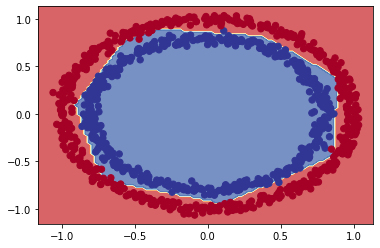

In [20]:
plot_decision_boundary(model_5, X, y)

[0.29, 0.99] is the accuracy now. 

*   Here can see from the training history that loss is decreasing trend even though the accuracy is nearing to 0.99. 
*   Also 1 class is having still an error of 0.29, which is still higher.
So can we reduce that loss further when there is a decreasing loss?




In [21]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])
model_5.fit(X,y,epochs = 200,verbose = 0)
model_5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9930


[0.06901048123836517, 0.9929999709129333]

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...


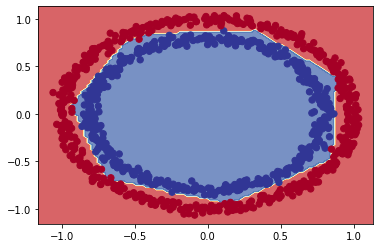

In [22]:
plot_decision_boundary(model_5, X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0086 - accuracy: 0.9970


[0.008563023060560226, 0.996999979019165]

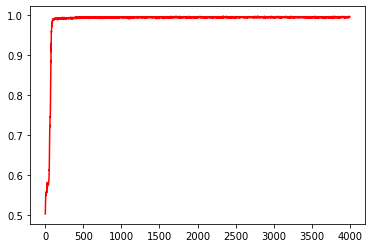

In [23]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])
history = model_5.fit(X,y, epochs = 4000,verbose = 0) # .019, .016, .014, .0138 , .0129, .0123, .0115, .0106, .0009 for 2000 epochs
plt.plot(history.history['accuracy'], color = 'red')
model_5.evaluate(X,y)

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...


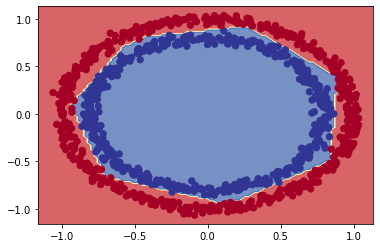

In [24]:
plot_decision_boundary(model_5, X, y)

Combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks (e.g since a shape detection model detects using straight and non-straihgt lines)

**Splitting into train and test sets**

In [15]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:,], y[800:,]

In [26]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
                               ])
model_6.compile(loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["accuracy"])
history = model_6.fit(X_train,y_train,epochs = 25,verbose = 1)

Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.6840 - accuracy: 0.5196
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5344
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5371
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5943
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.5837
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.5798
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.6507
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7259
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7919
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.7704
Epoch 11/25
25/25 [

In model_5, the accuracy started after 50 epochs almost. Hence in model_7, we can increase the learning rate from default (0.001) to 0.01.

*   Optimizers update how patterns are learnt and indicates how we can improve the model.
*   Learning rate is how to increase the step size so that how fast learning happens.
*   Loss indicates how accurate is that learnt pattern.
*   After increasing the lr, we can see that the learning is going in fast pace.



In [27]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...
-1.119543042647434 1.1171882597501503 -1.119543042647434 1.1171882597501503
1
Doing binary classifcation...


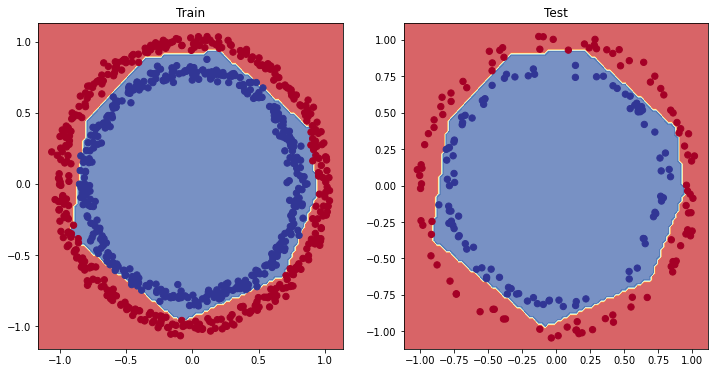

In [28]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6,X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6, X= X_test, y = y_test)

In [29]:
history.history

{'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.9662500023841858,
  0.9775000214576721,
  0.9737499952316284,
  0.9787499904632568,
  0.9775000214576721,
  0.9762499928474426],
 'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735945343971252,
  0.6681485772132874,
  0.6632686853408813,
  0.6545671820640564,
  0.6412575244903564,
  0.6264280676841736,
  0.6038310527801514,
  0.5714035630226135,
  0.5404428243637085,
  0.5015039443969727,
  0.468331903219223,
  0.4113016128540039,
  0.3625059425830841,
  0.32090437412261963,
  0.28470802307128906,
  0.2597200274467468,
  0.23746906220912933,
  0.2135196

Text(0.5, 1.0, 'Model loss curves')

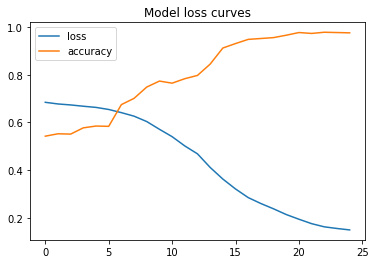

In [30]:
pd.DataFrame(history.history).plot()
plt.title("Model loss curves")

 Loss fn gng down means model is improving.
 Predictions that the model makes is closer to GT labels.
 We can plot all of our models loss curves, so tht we can find out which model is performng better and best learning rate

# Using tanh activation fn

In [31]:
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation = 'tanh'),
                               tf.keras.layers.Dense(4,activation = 'tanh'),
                               tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])
history = model_7.fit(X,y,epochs = 500,verbose = 0)
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 1.0000


[0.013905337080359459, 1.0]

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...


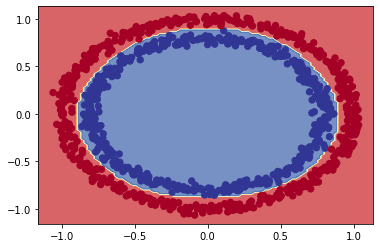

In [32]:
plot_decision_boundary(model_7, X, y)

Text(0.5, 1.0, 'Model loss curves')

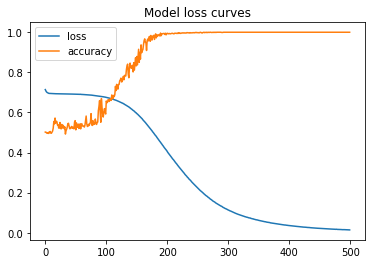

In [33]:
pd.DataFrame(history.history).plot()
plt.title("Model loss curves")

In [34]:
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation = 'tanh'),
                               tf.keras.layers.Dense(4,activation = 'tanh'),
                               tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])
history = model_8.fit(X_train,y_train,epochs = 300,verbose = 0)
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.6050


[0.6484509110450745, 0.6050000190734863]

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...


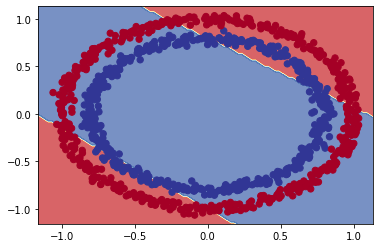

In [35]:
plot_decision_boundary(model_8, X, y)

Text(0.5, 1.0, 'Model loss curves')

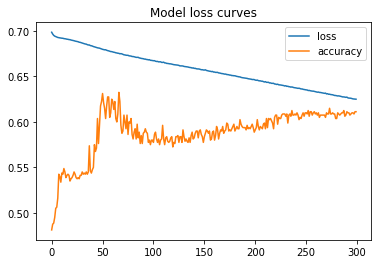

In [36]:
pd.DataFrame(history.history).plot()
plt.title("Model loss curves")

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...
-1.119543042647434 1.1171882597501503 -1.119543042647434 1.1171882597501503
1
Doing binary classifcation...


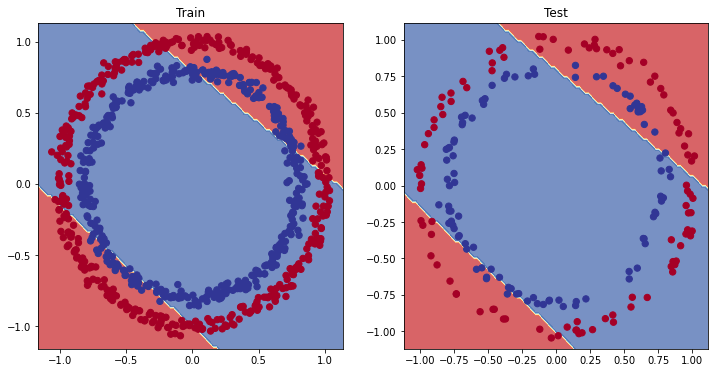

In [37]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X= X_test, y = y_test)

* 1 neuron - 1 layer - relu, SGD acc : 50
* 4,1 neuron - 2 layers - relu, SGD acc : 57
* 4,1 neuron - 2 layers - relu, sigmoid acc - 56
* 4,4,1 neuron - 3 layers - relu,sigmoid, Adam,epochs = 100 acc - 78
* 4,4,1 neuron - 3 layers - relu,sigmoid, Adam,epochs = 500 acc - 99.9

It's fun to see the changing decision boundary when trying out different optimizers, epochs and layers.

**The decision boundary is more piecewise linear when using relu.**

**The decision boundary is more smooth when using tanh.**


# Finding the best learning rate using loss curves

How to find the best learning rate( lr where the loss decreases the most during training) ? Following are the steps:

*   A lr callback - an extra piece of functionality that you can add to your model while training
*   Another model
*   Modified loss curves plot - loss vs lr.

**The lr value where the loss decreases the most is the ideal one.**

Other methods - guessing.
Typical lr values - 1, 0.1, 0.01, 0.001, 0.0001





In [42]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_9.compile(loss= 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

# lr callback - for every epoch the lr is incremented from 1e-4 to 10 to the power of epoch/20
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))
history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.4965
Epoch 11/

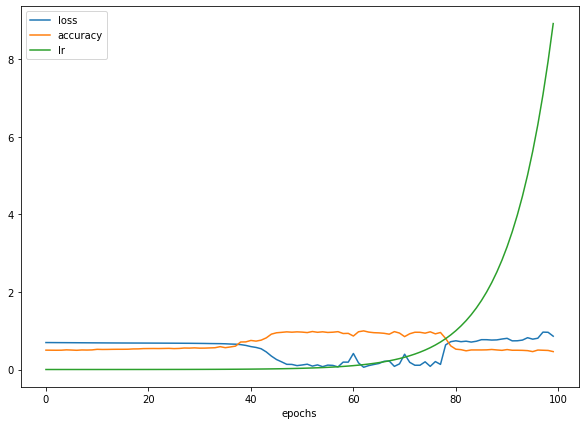

In [43]:
pd.DataFrame(history_9.history).plot(figsize = (10,7),xlabel = 'epochs')

The lr is incremented every epoch.
Accuracy goes slightly up and then goes down.
Loss goes down, stays low and goes up.
We want to find out the lr where the loss decreases the fastest. The value at 45 epochs maybe, is the place where the loss decreases the fastest.



Text(0.5, 1.0, 'lr vs loss')

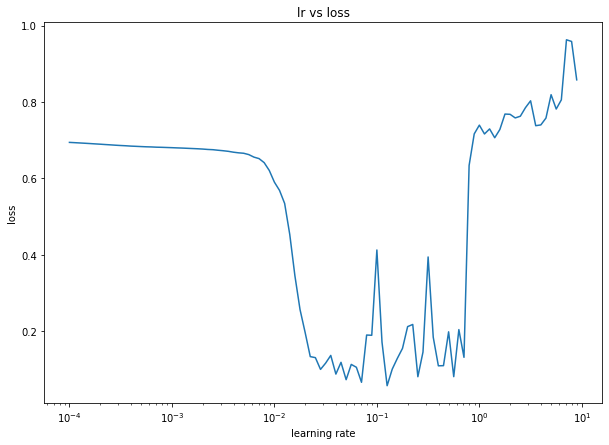

In [44]:
# Plot lr vs loss

lrs = 1e-4 * (10 ** (tf.range(100)/20)) # diff lr which our model tried out
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('lr vs loss')

Look at the part where the loss decreases the fastest.
Rule : lr value where the loss is still decreasing but not quite flattened out. Usually 10 times smaller than the bottom of the curve. Somwhere between 10 ^ -2 and 0.02. 


In [16]:
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4,activation = "relu"),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_10.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                 metrics = ['accuracy']
                 )
model_10.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [17]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

-1.1595024599098636 1.1337117525463374 -1.1595024599098636 1.1337117525463374
1
Doing binary classifcation...
-1.119543042647434 1.1171882597501503 -1.119543042647434 1.1171882597501503
1
Doing binary classifcation...


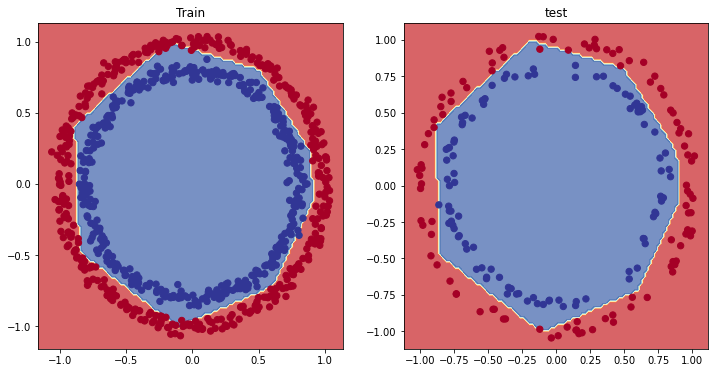

In [18]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10, X = X_test, y = y_test)

Other classification evaluation methods and metrics
* Accuracy
* Precision :High precision less FP
* Recall: High recall less FN
* F1 - score : combn of precision and recall
* Confusion matrix
* Classification report from sickit learn

# Confusion Matrix

In [19]:
y_test[:10].shape

(10,)

In [20]:
y_preds[:10]

NameError: ignored

Pred arrays has come out in **prediction probabilities** form, since they are from std output from sigmoid activation

In [21]:
tf.round(y_preds)[:10]

NameError: ignored

In [22]:
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

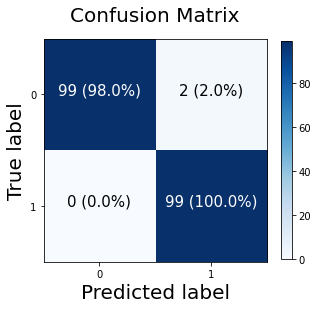

In [27]:
import itertools

figsize = (5, 5)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax,shrink = 0.80)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)
